# NLP 기반
- 형태소 분석, 구문 분석, 의미 분석(어렵다, 대안 wordembedding), 담화 분석(어렵다), 중의성 해소
- 이를 통해 검색, 온라인 광고(개인 맞춤형), 자동번역, 감정분석(사람들의 반응, 행동 탐색), 음성인식, 맞춤법 검사

## 분석
1. 형태소 분석

2. 구문 분석

3. 의미 분석

4. 담론 분석

# 1. stemming(어간 추출)

어간 추출은 형태학적 분석을 단순화한 버전이라고 볼 수도 있고, 정해진 규칙만 보고 단어의 어미를 자르는 어림짐작의 작업이라고 볼 수도 있습니다. 다시 말해, 이 작업은 섬세한 작업이 아니기 때문에 어간 추출 후에 나오는 결과 단어는 사전에 존재하지 않는 단어일 수도 있습니다.

In [2]:
import nltk

In [7]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

In [5]:
text="This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."

In [6]:
word_tokenize(text)

['This',
 'was',
 'not',
 'the',
 'map',
 'we',
 'found',
 'in',
 'Billy',
 'Bones',
 "'s",
 'chest',
 ',',
 'but',
 'an',
 'accurate',
 'copy',
 ',',
 'complete',
 'in',
 'all',
 'things',
 '--',
 'names',
 'and',
 'heights',
 'and',
 'soundings',
 '--',
 'with',
 'the',
 'single',
 'exception',
 'of',
 'the',
 'red',
 'crosses',
 'and',
 'the',
 'written',
 'notes',
 '.']

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kgh67\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### DB에 저장해 놓은 뉴스데이터 활용

In [9]:
import sqlite3
con = sqlite3.connect("news.db")
cur = con.cursor()

In [75]:
cur.execute("""
    SELECT content
    FROM table2
    ORDER BY id ASC
    """)
corpus = [_[0] for _ in cur.fetchall()]

In [76]:
len(corpus)

35

In [16]:
len(corpus[0].split()), len(corpus[0].splitlines())

(937, 102)

In [17]:
from nltk.tokenize import sent_tokenize
len(sent_tokenize(corpus[0]))

50

In [20]:
sent_tokenize(corpus[0])[0]

'당초 예정된 시각보다 1시간 넘기며 토론…靑 "文대통령, 여야대표와 적극적 의견 개진"\n\n15분 남짓 사전환담서 가벼운 덕담 오가…黃 "세 번째 대표 축하" 沈 "두 번째다"\n\n文대통령·여야 대표, 靑·여야 대변인과 머리 맞대고 공동발표문 조율\n\n文대통령·황교안, 회동후 1분 30초간 \'독대\'…黃 "단독회동 아니다"\n\n日 수출규제 총력대응 공감대 속 \'추경 처리\'·\'안보라인 교체\' 요구 \'장군멍군\'\n\n(서울=연합뉴스) 박경준 이동환 기자 = 지난해 3월에 이어 1년 4개월 만에 18일 청와대에서 열린 문재인 대통령과 여야 대표 5당 회동은 화기애애한 분위기 속에서 국가적 위기 앞에 \'초당적 협력\'을 다짐하는 자리였다.'

In [24]:
corpus[0].splitlines()[0]

'당초 예정된 시각보다 1시간 넘기며 토론…靑 "文대통령, 여야대표와 적극적 의견 개진"'

In [25]:
sent_tokenize("Life is too short.")

['Life is too short.']

In [27]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
sent_tokenize("""
    Life is too short,.... ! but I'm hungry
    Life is too short    
    """)

['\n    Life is too short,.... !', "but I'm hungry\n    Life is too short"]

In [29]:
sent_tokenize("""안녕. 너의 이름은 뭐니? 날이 참 춥다 ㅠㅠ 행복하자! 안녕, 잘가""")

['안녕.', '너의 이름은 뭐니?', '날이 참 춥다 ㅠㅠ 행복하자!', '안녕, 잘가']

In [30]:
from nltk.tokenize import TweetTokenizer

In [31]:
word_tokenize("You need Python =)")

['You', 'need', 'Python', '=', ')']

In [32]:
TweetTokenizer().tokenize("you need Python =):()")

['you', 'need', 'Python', '=)', ':(', ')']

## 정규화

In [33]:
from nltk.tokenize import regexp_tokenize

In [34]:
import re

파이썬은 정규 표현식을 지원하기 위해 re(regular expression의 약어) 모듈을 제공한다. re 모듈은 파이썬을 설치할 때 자동으로 설치되는 기본 라이브러리로 사용 방법은 다음과 같다.

> import re
> p = re.compile('ab*')

re.compile을 사용하여 정규 표현식(위 예에서는 ab*)을 컴파일한다. re.compile의 결과로 돌려주는 객체 p(컴파일된 패턴 객체)를 사용하여 그 이후의 작업을 수행할 것이다.

In [42]:
pattern = re.compile(r"\b(\w+)\b")
regexp_tokenize("You need Python!!!! 12 한#$#%@#글", pattern)

['You', 'need', 'Python', '12', '한', '글']

In [43]:
pattern = re.compile(r"\b([가-힣]\b)")
regexp_tokenize("ㅜㅜ ㅠㅠ ㅋㅋ 한#@$글", pattern)

['한', '글']

## Text 개체

In [44]:
from nltk import Text

In [45]:
Text(word_tokenize(corpus[0]))

<Text: 당초 예정된 시각보다 1시간 넘기며 토론…靑 `` 文대통령...>

In [46]:
text = Text(word_tokenize(corpus[0]))

In [47]:
text.vocab().B(), text.vocab().N()

(644, 1135)

In [49]:
text.vocab().most_common(30)

[('.', 48),
 (',', 29),
 ('``', 27),
 ("''", 27),
 ('대표', 18),
 ('대표가', 16),
 ('대표는', 15),
 ('5당', 14),
 ('문', 14),
 ('황', 13),
 ('여야', 12),
 ('정', 10),
 ('대통령과', 9),
 ('라고', 8),
 ('(', 7),
 (')', 7),
 ('오후', 7),
 ('문재인', 6),
 ('회동', 6),
 ("'", 5),
 ('서울=연합뉴스', 5),
 ('기자', 5),
 ('=', 5),
 ('이어', 5),
 ('18일', 5),
 ('청와대에서', 5),
 ('일본의', 5),
 ('대통령이', 5),
 ('있다', 5),
 ('황교안', 5)]

In [50]:
import matplotlib.pyplot as plt

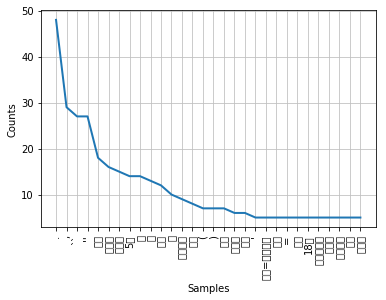

In [51]:
text.plot(30)

## Empricial Law
### 1. Zipf's Law
- frequency of word is inversely proprotional to its rank in frequency table
- most frequent word will occur approximately twice
- 요소 개체의 규모가 요소 개체의 규모 순위에 반비례한다는 법칙이다
- 자주 쓰이는 낱말과 비교해 두 번째로 자주 쓰이는 낱말의 사용 빈도는 1/2이며, 세 번째로 자주 쓰이는 낱말의 사용빈도는 1/3, 네 번째는 1/4... 이런 식의 규칙이 나타난 것이다
- 이 데이터에 맞으면 데이터가 편향되지 않고 좋은 결과를 예상할 수 있다

- 단어 빈도는 단어 순위로도 혹은 빈도로도 자를 수 있다
- 이를 통해 누가 중요한지 알 수 있다
- 대략적으로 같은 형태의 그래프
- 일반적으로 상, 하위 20%나 top k를 버리고 시작한다

In [52]:
text.vocab().freq("대표") # 상위 top k개 안에 들어가는 애들이 나온다

0.015859030837004406

In [54]:
ratio = 0.0
for _ in [_[0] for _ in text.vocab().most_common(10)]:
    ratio += text.vocab().freq(_)
    print(text.vocab().freq(_))
print(ratio) 
# 500개의 단어 중 상위 10개의 비중을 보여주는 것

0.04229074889867841
0.02555066079295154
0.02378854625550661
0.02378854625550661
0.015859030837004406
0.014096916299559472
0.013215859030837005
0.012334801762114538
0.012334801762114538
0.01145374449339207
0.1947136563876652


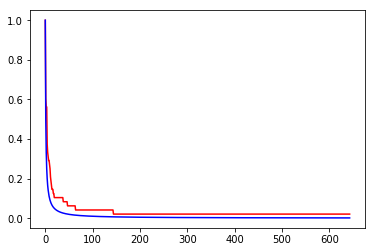

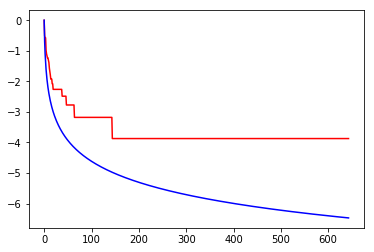

In [55]:
from math import log
token = [_[0] for _ in sorted(text.vocab().items(), key = lambda x:x[1], reverse=True)]
freq = [_[1]/text.vocab().most_common(1)[0][1] for _ in sorted(text.vocab().items(), key = lambda x:x[1], reverse=True)]
_freq = [log(_) for _ in freq]
rank = [1/(_+1) for _ in range(len(token))]
_rank = [log(_) for _ in rank]

plt.plot([i for i in range(len(token))], freq, "r-")                                                              
plt.plot([i for i in range(len(token))], rank, "b-")
plt.show()
plt.plot([i for i in range(len(token))], _freq, "r-")                                                              
plt.plot([i for i in range(len(token))], _rank, "b-")
plt.show()

## Heap's Law
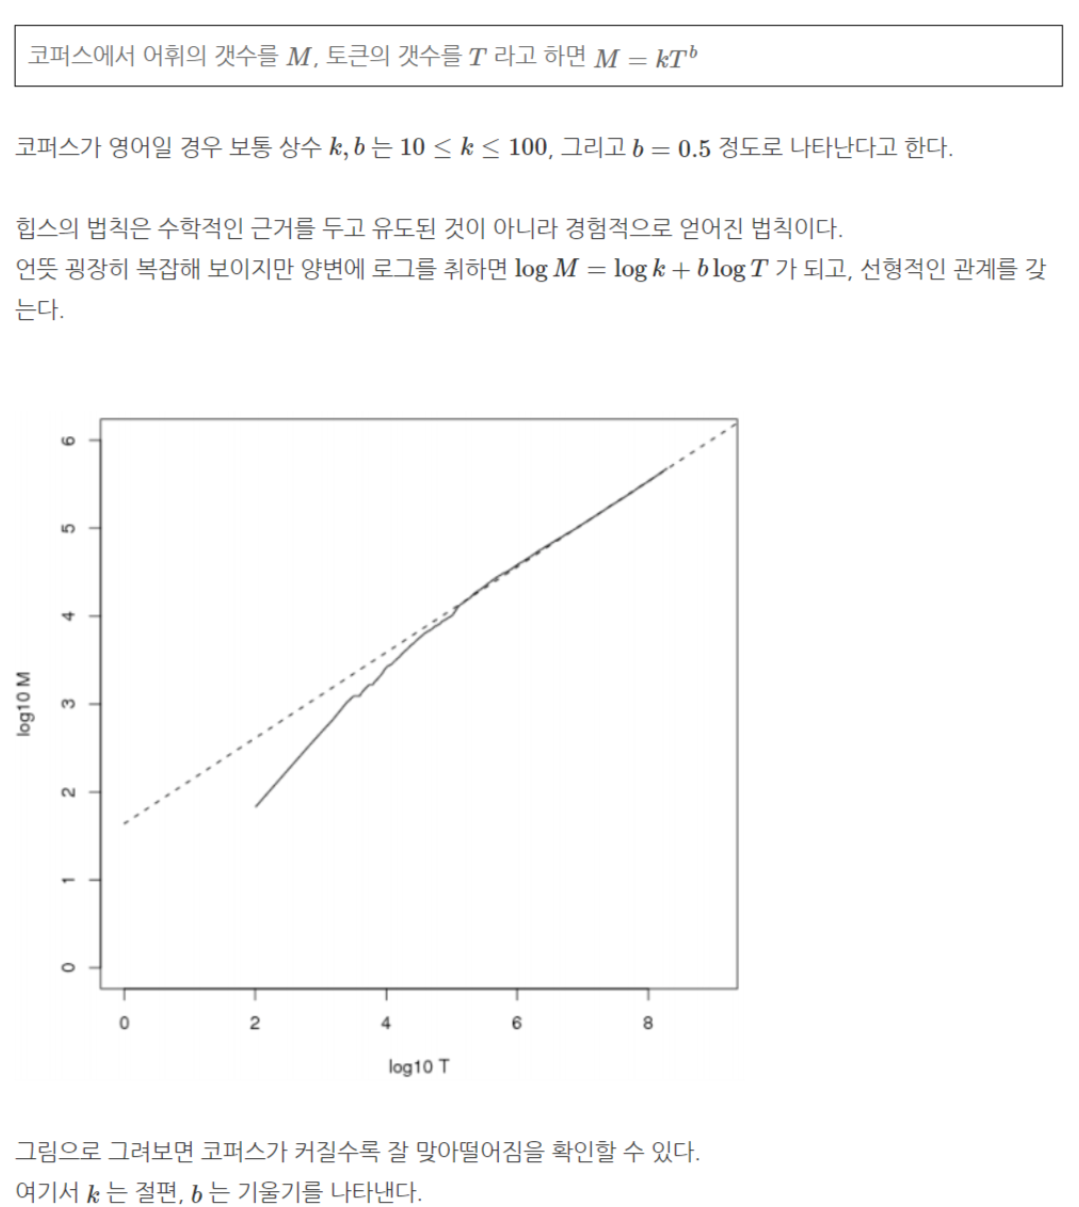

### 코퍼스가 커질수록 위 그래프와 잘 맞아떨어진다

# n-gram : language model
- 어간을 찾기 좋은 approach

n-gram 언어 모델은 여전히 카운트에 기반한 통계적 접근을 사용하고 있으므로 SLM의 일종입니다. 다만, 앞서 배운 언어 모델과는 달리 이전에 등장한 모든 단어를 고려하는 것이 아니라 일부 단어만 고려하는 접근 방법을 사용합니다. 그리고 이때 일부 단어를 몇 개 보느냐를 결정해야하는데 이것이 n-gram에서의 n이 가지는 의미입니다

- 확률 값을 계산하기 위해 만들어진 language 값 중 하나
- 확률을 분석하여 다음에 올 애를 예측할 수 있다
- 앞에 있는 것들이 충분히 양이 많았을 때 다음에 올 애를 '조건부 확률'을 이용해서 예측

In [56]:
from collections import defaultdict

defaultdict 함수는 dict함수와는 달리 default 값이 없다. defaultdict()는 딕셔너리를 만드는 dict클래스의 서브클래스이다.작동하는 방식은 거의 동일한데, defaultdict()는 인자로 주어진 객체(default-factory)의 기본값을 딕셔너리값의 초깃값으로 지정할 수 있다. 숫자, 리스트, 셋등으로 초기화 할 수 있기때문에 여러 용도로 사용할 수 있다


In [64]:
sentence = "Life is too short, You need Python."

In [67]:
def eojeo1(sentence, N = 2):
    tokens = word_tokenize(sentence)
    ngram = list()
    for i in range(len(tokens)-(N-1)):
        ngram.append("".join(tokens[i:i+N]))
    return ngram
eojeo1(sentence)

['Lifeis',
 'istoo',
 'tooshort',
 'short,',
 ',You',
 'Youneed',
 'needPython',
 'Python.']

In [83]:
# 띄어쓰기 만들고 싶다면
def eojeo1(sentence, N = 2):
    tokens = word_tokenize(sentence)
    ngram = list()
    for i in range(len(tokens)-(N-1)):
        ngram.append(tuple((tokens[i:i+N])))
    return ngram
eojeo1(sentence)

[('Life', 'is'),
 ('is', 'too'),
 ('too', 'short'),
 ('short', ','),
 (',', 'You'),
 ('You', 'need'),
 ('need', 'Python'),
 ('Python', '.')]

In [70]:
eojeo1(sentence, 3)

[['Life', 'is', 'too'],
 ['is', 'too', 'short'],
 ['too', 'short', ','],
 ['short', ',', 'You'],
 [',', 'You', 'need'],
 ['You', 'need', 'Python'],
 ['need', 'Python', '.']]

In [84]:
freq = defaultdict(int)
for _ in eojeo1(corpus[0]):
    freq[_] += 1

In [86]:
sorted(freq.items(), key = lambda x:x[1], reverse=True)[:10]
# 제일 많이 나타나는 상위 10개 쌍

[(("''", '라고'), 8),
 (('대표', ','), 6),
 (('여야', '5당'), 6),
 (('.', '황'), 6),
 (('(', '서울=연합뉴스'), 5),
 (('서울=연합뉴스', ')'), 5),
 (('기자', '='), 5),
 (('있다', '.'), 5),
 (('@', 'yna.co.kr'), 5),
 (('황', '대표가'), 5)]

In [96]:
freq[('(', '서울=연합뉴스')]/sum(freq.values()) 

0.004409171075837742

In [92]:
#P("'") 
# 괄호로 끝날 확률을 알고 싶다

In [ ]:
P(")"|"서울=연합뉴스")
P("서울=연합뉴스"|"(")
P("(")

In [99]:
[_ for _ in freq if _[0] == ")"]

[(')', '박경준'), (')', '한국'), (')', '처리나'), (')', '배재만')]

In [113]:
# 음절 단위로
def umjeo1(token, N = 2):
    tokens = list(token)
    ngram = list()
    for i in range(len(tokens)-(N-1)):
        ngram.append("".join(tokens[i:i+N]))
    return ngram
eojeo1(sentence, 3)
umjeo1(corpus[0].splitlines()[0])

['당초',
 '초 ',
 ' 예',
 '예정',
 '정된',
 '된 ',
 ' 시',
 '시각',
 '각보',
 '보다',
 '다 ',
 ' 1',
 '1시',
 '시간',
 '간 ',
 ' 넘',
 '넘기',
 '기며',
 '며 ',
 ' 토',
 '토론',
 '론…',
 '…靑',
 '靑 ',
 ' "',
 '"文',
 '文대',
 '대통',
 '통령',
 '령,',
 ', ',
 ' 여',
 '여야',
 '야대',
 '대표',
 '표와',
 '와 ',
 ' 적',
 '적극',
 '극적',
 '적 ',
 ' 의',
 '의견',
 '견 ',
 ' 개',
 '개진',
 '진"']

In [108]:
eojeo1(sentence, 3)
umjeo1(corpus[0].splitlines()[0])

## WPM
- 하나의 단어를 내부 단어들로 분리하는 단어 분리 모델

WPM(Word Piece Model)은 하나의 단어를 내부 단어(Subword Unit)들로 분리하는 단어 분리 모델입니다.

실제로 2016년에 구글이 낸 논문(Google’s Neural Machine Translation System: Bridging the Gap between Human and Machine Translation [Wo at el.2016])에서 구글은 자신들의 구글 번역기에서 WPM이 어떻게 수행되는지에 대해서 기술하였습니다.

WPM을 수행하기 이전의 문장: Jet makers feud over seat width with big orders at stake
WPM을 수행한 결과(wordpieces): _J et _makers _fe ud _over _seat _width _with _big _orders _at _stake

Jet는 J와 et로 나누어졌으며, feud는 fe와 ud로 나누어진 것을 볼 수 있습니다. WPM은 입력 문장에서 기존에 존재하던 띄어쓰기는 언더바로 치환하고, 단어는 내부단어(subword)로 통계에 기반하여 띄어쓰기로 분리합니다. 기존의 띄어쓰기를 언더바로 치환하는 이유는 차후 다시 문장 복원을 위한 장치입니다. WPM의 결과로 나온 문장을 보면, 기존에 없던 띄어쓰기가 추가되어 내부 단어(subwords)들을 구분하는 구분자 역할을 하고 있으므로 본래의 띄어쓰기를 언더바로 치환해놓지 않으면, 기존 문장으로 복원할 수가 없습니다. WPM이 수행된 결과로부터 다시 수행 전의 결과로 돌리는 것 방법은 현재 있는 띄어쓰기를 전부 삭제하여 내부 단어들을 다시 하나의 단어로 연결시키고, 언더바를 다시 띄어쓰기로 바꾸면 됩니다.

## BPE

구글의 WPM에는 BPE(Byte Pair Encoding) 알고리즘이 사용되었습니다. BPE 알고리즘 자체는 1994년에 제안된 알고리즘이지만 Neural Machine Translation of Rare Words with Subword Units [Sennrich at el.2015]라는 논문에서 최초로 기계 번역을 위해 BPE 알고리즘을 통해 단어 분리(Subword Segmentation)를 사용할 것 제안하였습니다. 그리고 현재는 자연어 처리를 위한 주요 전처리 방법으로 사용되고 있습니다.

- 어간을 추출하기 위한 방법
- 빈도를 기반으로 누구를 합칠 것인지, 누구를 분리시킬 것인지
- 어느 정도가 되면 그 단어를 가지고 분석한다

## Normalization
- ex) '김유자' 같은 경우 이름인데 떼지면 안되니깐 이를 방지

In [187]:
tokens = {
    "l o w </w>" : 5,
    "l o w e s t </w>" : 2,
    "n e w e r </w>" : 6,
    "w i d e r </w>" : 3
}
# 단어가 들어오면 끝에는 </w>를 붙인다
# 각각의 음절을 다 분리시킨다

In [228]:
ngram = defaultdict(int)
for token, freq in tokens.items():
    syllables = token.split()
    for i in range(len(syllables) - 1):
        ngram[tuple(syllables[i:i+2])] += freq

In [221]:
ngram

defaultdict(int,
            {('l', 'o'): 7,
             ('o', 'w'): 7,
             ('w', '</w>'): 5,
             ('w', 'e'): 8,
             ('e', 's'): 2,
             ('s', 't'): 2,
             ('t', '</w>'): 2,
             ('n', 'e'): 6,
             ('e', 'w'): 6,
             ('e', 'r'): 9,
             ('r', '</w>'): 9,
             ('w', 'i'): 3,
             ('i', 'd'): 3,
             ('d', 'e'): 3})

In [222]:
# 빈도수가 제일 높은 애
maxKey = max(ngram, key = lambda x:x[1])

In [223]:
print(maxKey)

('o', 'w')


In [230]:
# 합치자
maxKey = max(ngram, key=ngram.get)
newTokens = dict()
for token in tokens:
    newTokens[re.sub(" ".join(maxKey), "".join(maxKey), token)] = freq

In [225]:
newTokens

{'l ow </w>': 3,
 'l ow e s t </w>': 3,
 'n e w e r </w>': 3,
 'w i d e r </w>': 3}

In [231]:
# 앞에서부터 다시 시작
tokens = newTokens

In [233]:
newTokens # 계속 반복하다보면 이렇게 합쳐진다

{'low </w>': 3, 'low e s t </w>': 3, 'n e w e r </w>': 3, 'w i d e r </w>': 3}

In [240]:
def findBigram(tokens):
    ngram = defaultdict(int)
    for token, freq in tokens.items():
        syllables = token.split()
        for i in range(len(syllables)-1):
            ngram[tuple(syllables[i:i+2])] +=freq
    return ngram


In [241]:
def mergeMaxkey(ngram, tokens, K):
    maxKey = max(ngram, key=ngram.get)
    maxValue = max(ngram.values())
    newTokens = dict()

    for token, freq in tokens.items():
        newTokens[re.sub(" ".join(maxKey), "".join(maxKey), token) if maxValue > K else token] = freq
    #print(maxKey)
    return newTokens

In [245]:
tokens = {
    "아 버 지 가 </w>" : 5,
    "아 버 지 께 서 </w>" : 2,
    "아 버 지 를 </w>" : 6,
    "아 버 지 에 게</w>" : 3
}

K = max(tokens.values())
for _ in range(5):
    maxKey = findBigram(tokens)
    tokens = mergeMaxkey(maxKey, tokens, K)

pattern = r"[가-힣a-z\/\<\>]{2,}"    
#pattern = r"[A-Za-z\/\<\>]{2,}"
result = list()
for _ in tokens:
    result.extend([_ for _ in re.findall(pattern, _) if _ != "</w>"])
print(set(result))

{'게</w>', '아버지'}
